In [168]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pprint import pprint
from operator import truediv
from __future__ import division

"""
Filters relevant parameters and data from results file into a dictionary.
Processes results *as is*; doesn't check for missing data, etc. 
"""
def getResults(fPath):
    app_info = dict()
    with open(fPath, 'r') as f:
        curr_graph = None
        for line in f:
            if "graph=" in line:
                g_info = line.split(',')
                graph = g_info[0].split("=")[1].strip()
                if (graph not in app_info.keys()):
                    app_info[graph] = dict()
                curr_graph = graph
            if "k=" in line and ":" in line:
                t_split = line.split(":")
                k = int(t_split[0].split("=")[1])
                t = float(t_split[1].strip())
                app_info[curr_graph][k] = t
                
    return app_info

def plotMultiGraph(paths, apps, graphs, K, title="test"):
    all_info = [getResults(p) for p in paths]
    all_times = []
    for i,app in enumerate(apps):
        app_info = all_info[i]
        graph_times = []
        for g in graphs:
            t = app_info[g].get(K, 0)
            graph_times.append(t)
        all_times.append(graph_times)
    
    barChart(all_times, apps, graphs, title, logy=True)
    
def plotMultiGraphSpeedup(paths, apps, graphs, K, title="test"):
    all_info = [getResults(p) for p in paths]
    all_speedups = []
    base_info = all_info[0]
    for i,app in enumerate(apps):
        app_info = all_info[i]
        speedups = []
        for g in graphs:
            t = app_info[g].get(K, 0)
            base_t = base_info[g].get(K, 0)
            if not t or not base_t:
                speedups.append(0)
            else:  
                speedups.append(base_t / t)
        all_speedups.append(speedups)
    
    barChart(all_speedups, apps, graphs, title)

def plotSingleGraphSpeedup(paths, apps, k_list, graph, title="test"):
    all_info = [getResults(p) for p in paths]
    all_speedups = []
    base_info = all_info[0]
    for i,app in enumerate(apps):
        app_info = all_info[i]
        speedups = []
        for K in k_list:
            t = app_info[graph].get(K, 0)
            base_t = base_info[graph].get(K, 0)
            if not t or not base_t:
                speedups.append(0)
            else:  
                speedups.append(base_t / t)
        all_speedups.append(speedups)
    
    scatterPlot(all_speedups, apps, title)
    
def scatterPlot(scatter_info, series, title, logy=False):
    plt.figure(figsize=(15, 10), dpi=300)
    ax = plt.subplot()
    if logy:
        ax.set_yscale('log', basey=10)
    for i, values_list in enumerate(scatter_info): # missing marker
        ax.scatter(k_list, scatter_info[i], s=20, label=series[i], color=cm.jet(1.*i/len(scatter_info)))

    ax.set_xlabel("K")
    ax.set_ylabel("Speedup")
    ax.set_title(title)
#     ax.set_xticks(ind + (len(bar_info)/2)*width - (width/2), minor=False)
#     ax.set_xticklabels(bar_labels)
    ax.legend(loc='best')
    

def barChart(bar_info, xLabels, bar_labels, title, logy=False):
    N = len(bar_info[0])
    ind = np.arange(N)
    margin=.15
    width=(1-margin)/len(bar_info)

    plt.figure(figsize=(15, 10), dpi=300)
    ax = plt.subplot()
    if logy:
        ax.set_yscale('log', basey=10)
    for i, values_list in enumerate(bar_info):
        ax.bar(ind+i*width, values_list, width, label=xLabels[i], color=cm.jet(1.*i/len(bar_info)))

    ax.set_xlabel("Benchmark")
    ax.set_ylabel("Speedup")
    ax.set_title(title)
    ax.set_xticks(ind + (len(bar_info)/2)*width - (width/2), minor=False)
    ax.set_xticklabels(bar_labels)
    ax.legend(loc='best')


In [169]:
pprint(getResults("../results/python-5-22-17.out"))

{'amazon0302': {3: 5.1900699999999995,
                6: 5.839156,
                12: 8.76052,
                24: 14.329521,
                48: 14.592068000000001},
 'cit-Patents': {3: 240.662271,
                 6: 280.746943,
                 12: 313.79043,
                 24: 349.54076999999995,
                 48: 386.263504},
 'graph500-scale18-ef16': {3: 2807.064485,
                           6: 2696.2391900000002,
                           12: 2880.505734,
                           24: 2819.804305,
                           48: 2676.931132}}


In [170]:
# pprint(getResults("../results/custinger-max-5-24-17.out"))
pprint(getResults("../results/matlab-5-22-17.out"))

{'amazon0302': {3: 3.624374,
                6: 23.688972,
                12: 5.619781,
                24: 2.491554,
                48: 2.227959},
 'cit-Patents': {3: 226.600853, 12: 932.787689, 24: 527.119591, 48: 364.117218},
 'graph500-scale18-ef16': {}}


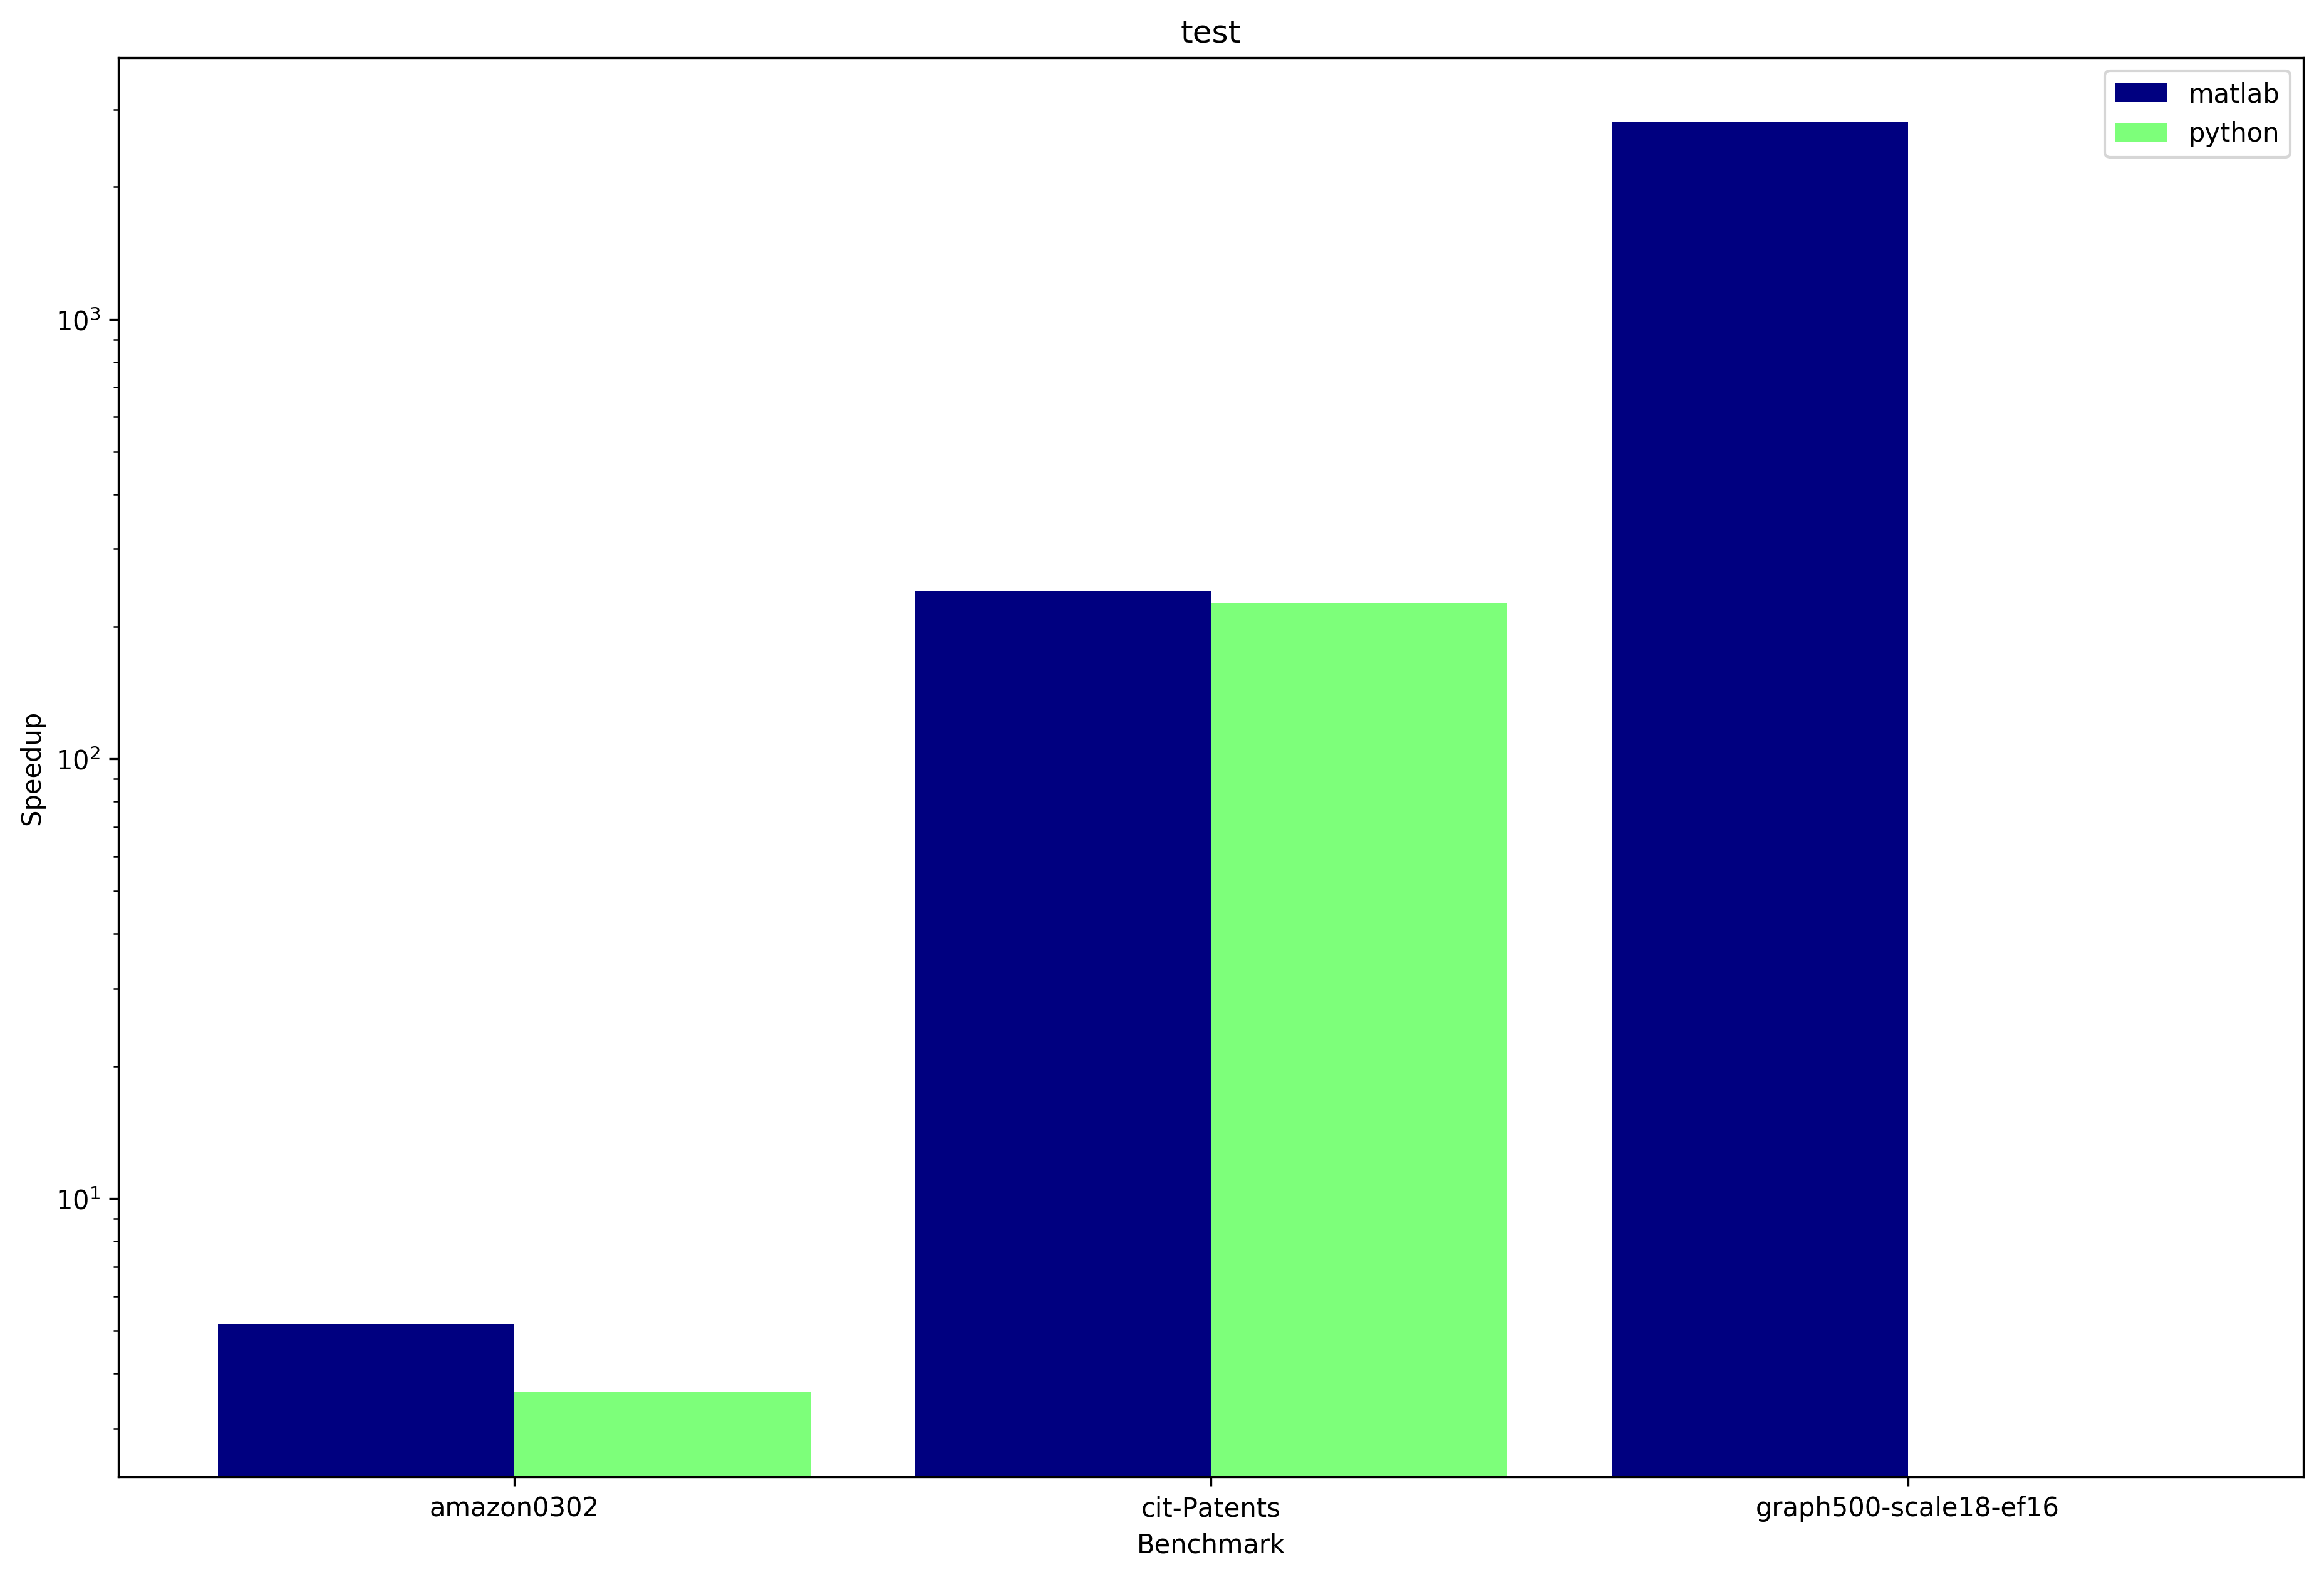

In [171]:
results = ["../results/python-5-22-17.out", 
          "../results/matlab-5-22-17.out"]
benchmarks = ["matlab", "python"]
graphs = ["amazon0302", "cit-Patents", "graph500-scale18-ef16"]
plotMultiGraph(results, benchmarks, graphs, 3)

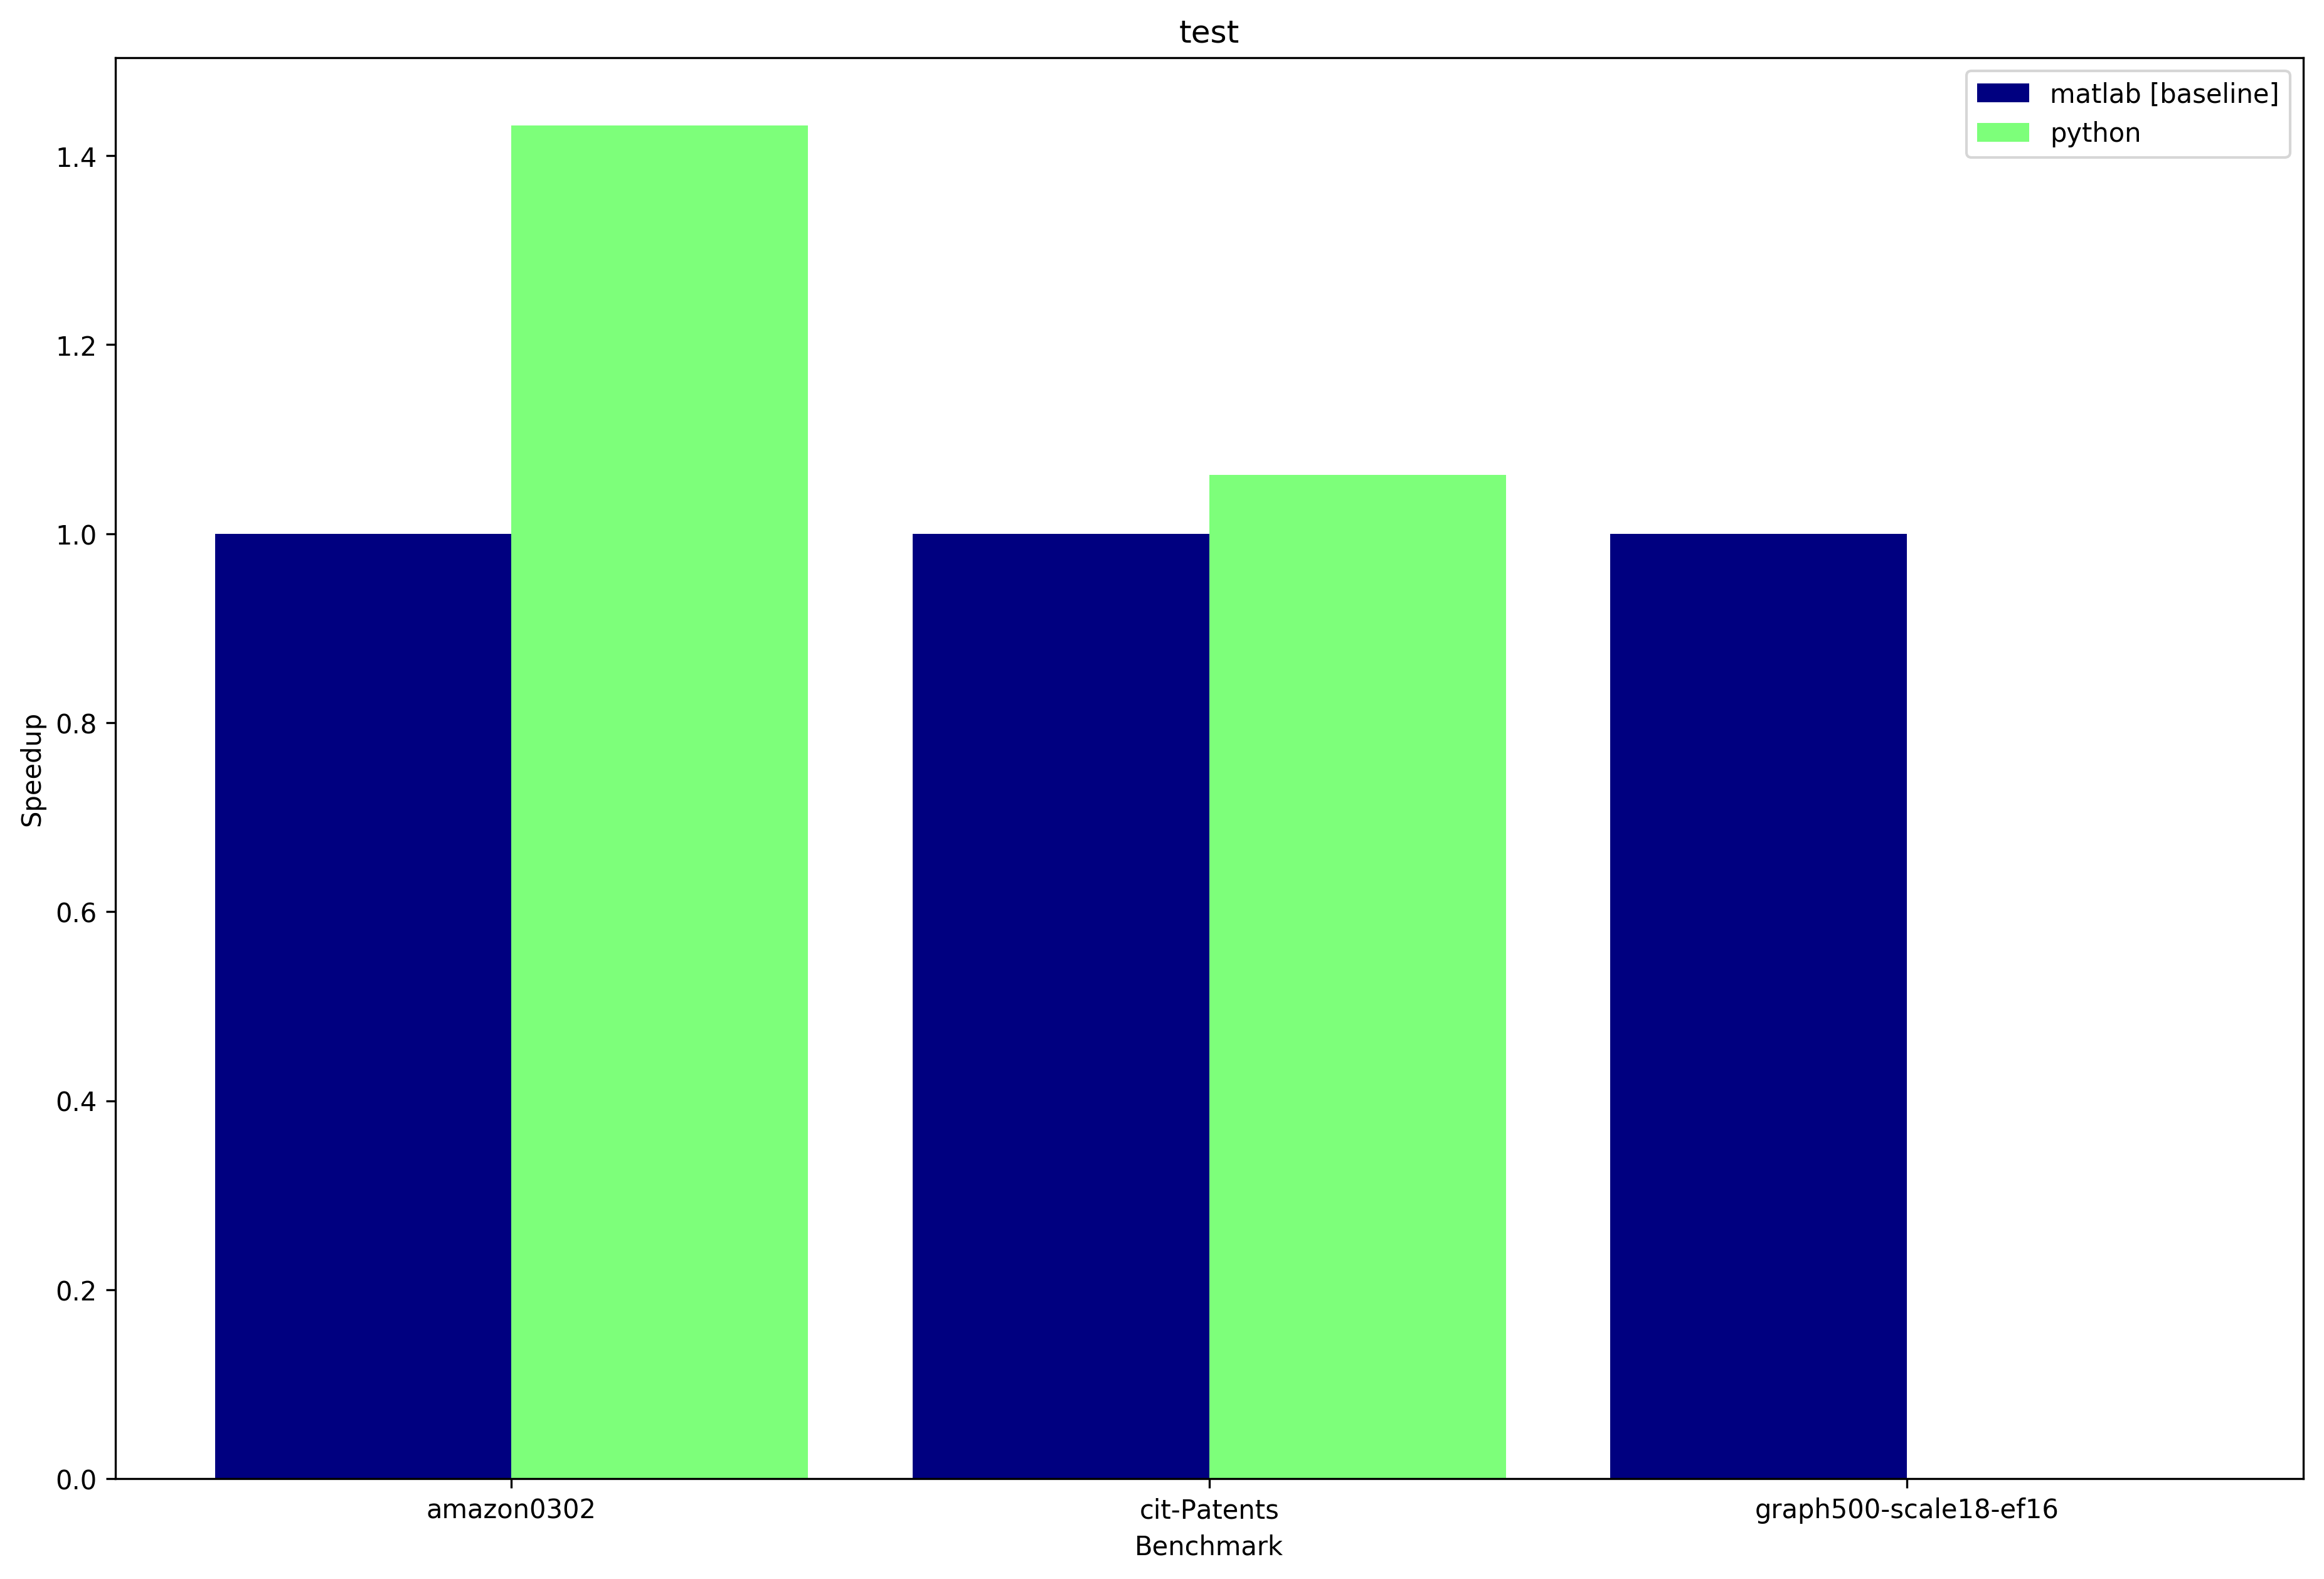

In [172]:
results = ["../results/python-5-22-17.out", 
          "../results/matlab-5-22-17.out"]
benchmarks = ["matlab [baseline]", "python"]
graphs = ["amazon0302", "cit-Patents", "graph500-scale18-ef16"]
plotMultiGraphSpeedup(results, benchmarks, graphs, 3)

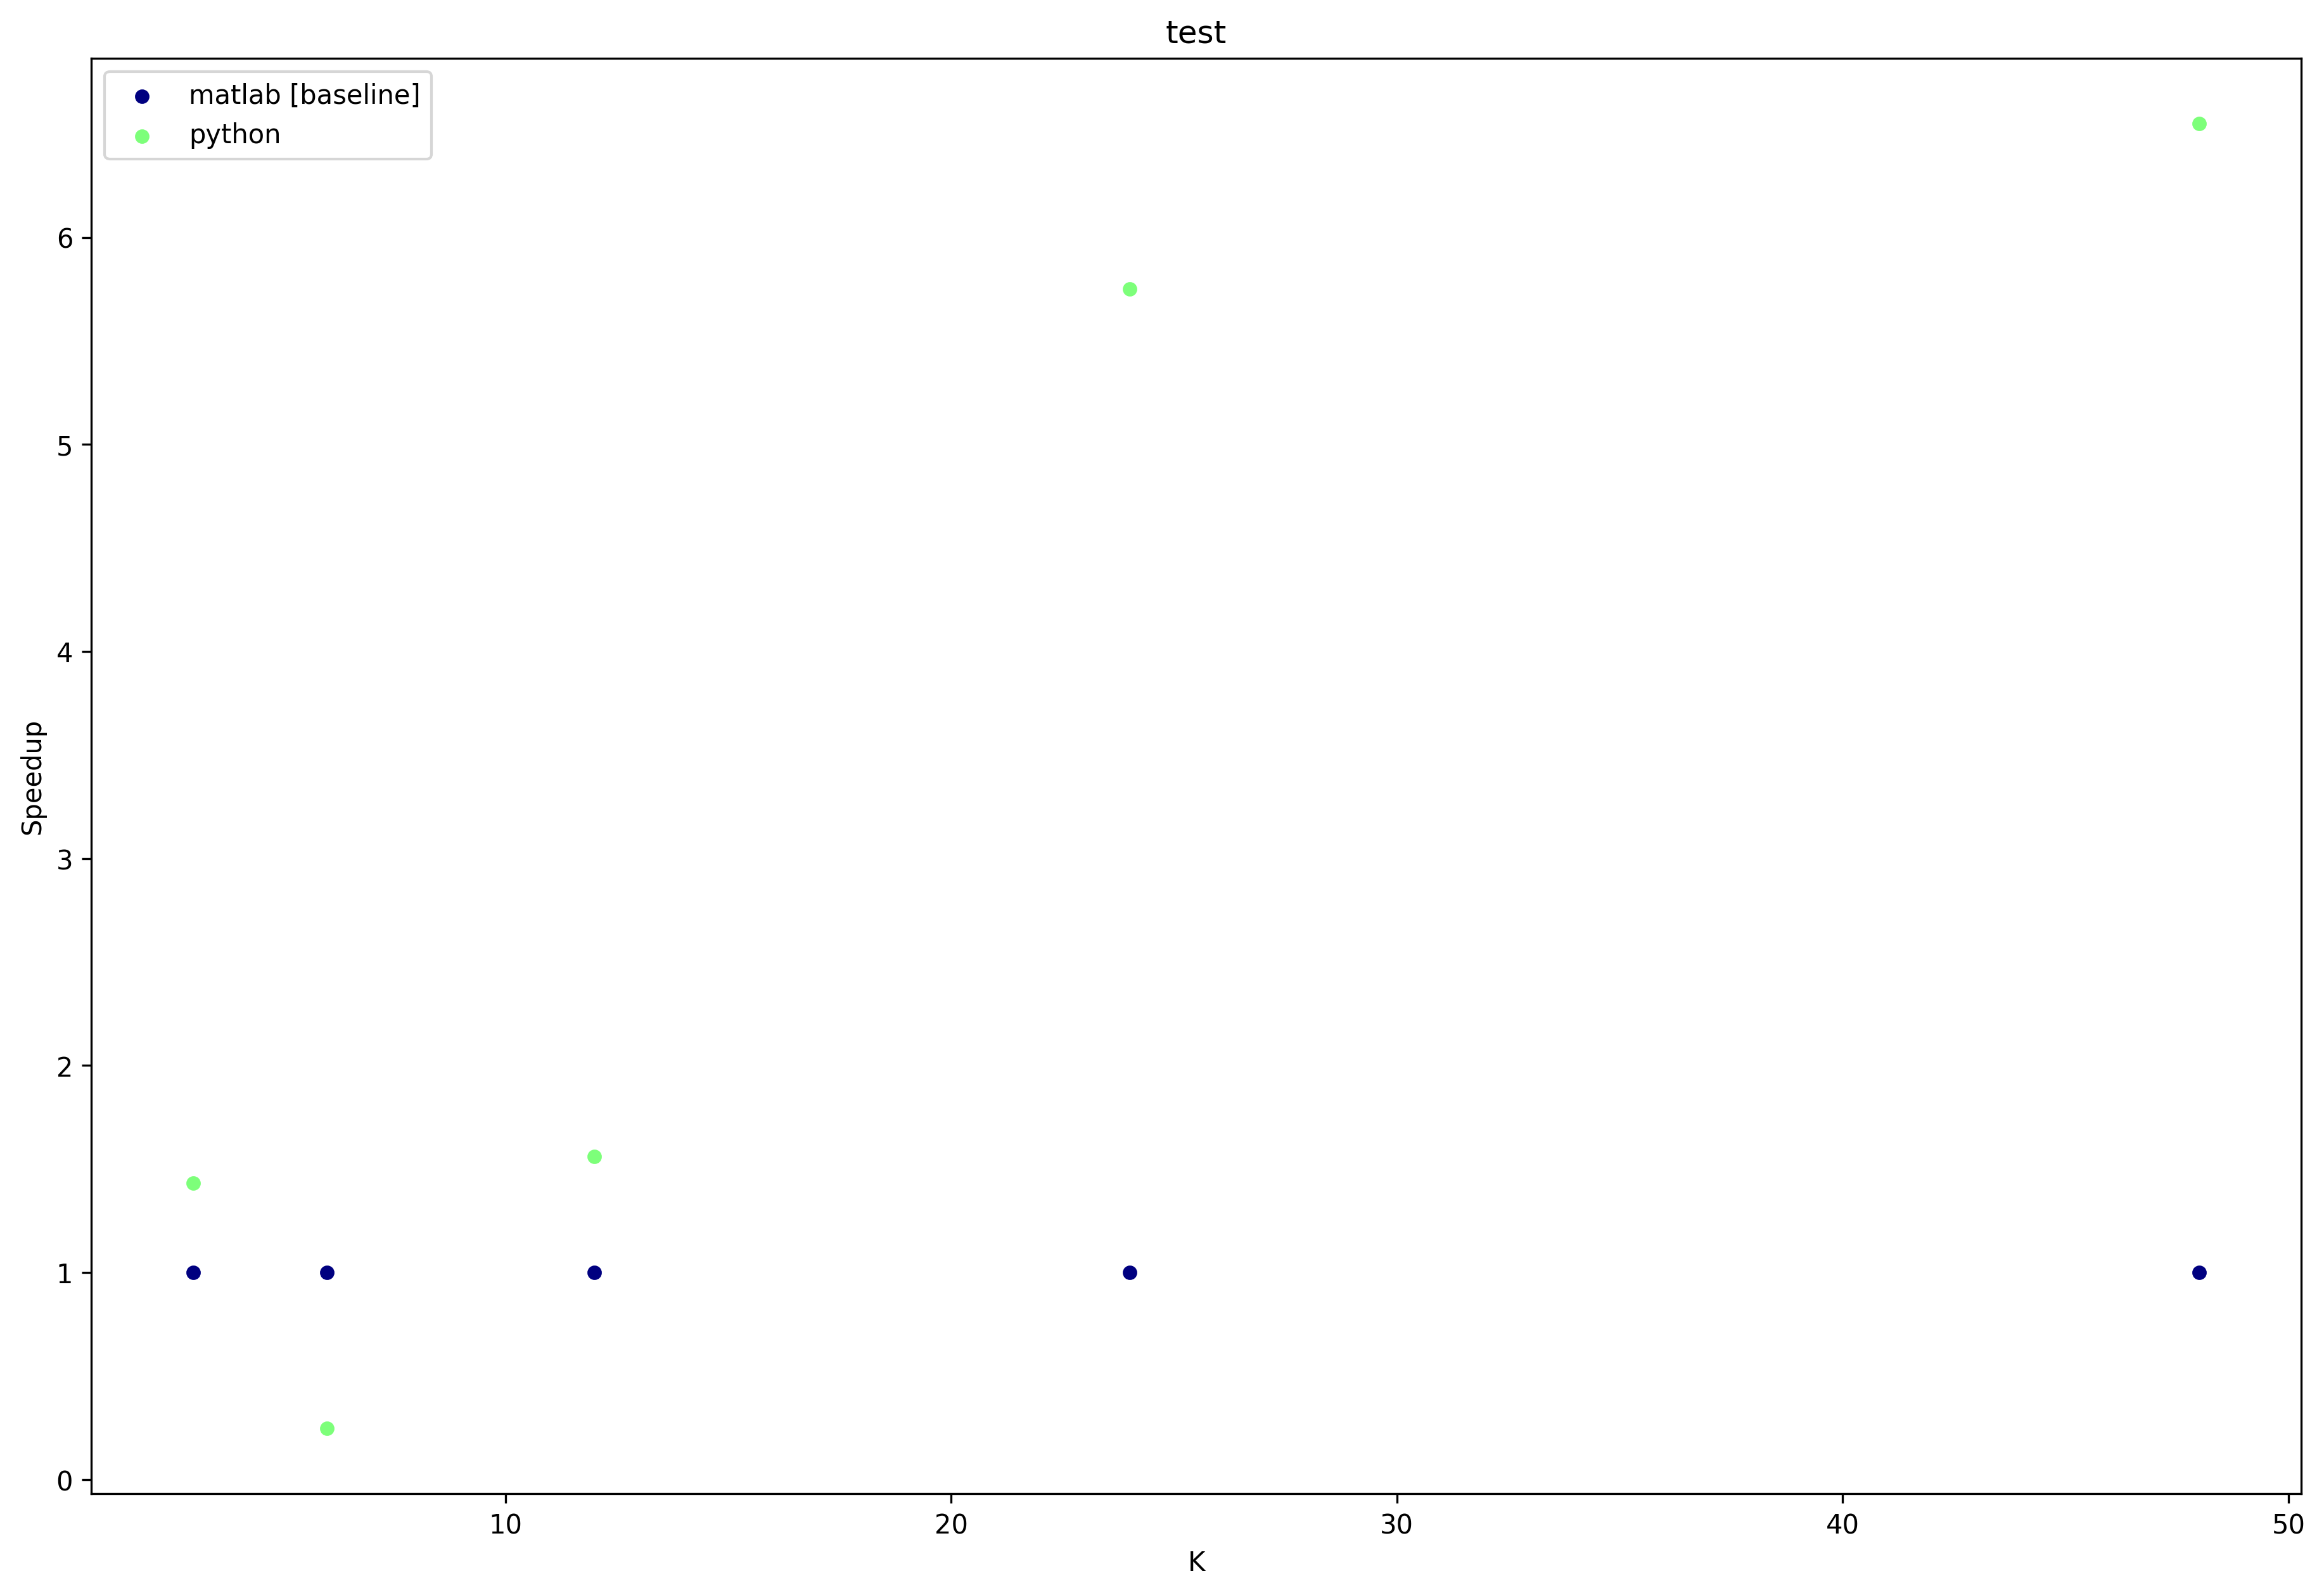

In [173]:
results = ["../results/python-5-22-17.out", 
          "../results/matlab-5-22-17.out"]
benchmarks = ["matlab [baseline]", "python"]
graph = "amazon0302"
k_list = [3, 6, 12, 24, 48]
plotSingleGraphSpeedup(results, benchmarks, k_list, graph)